In [2]:
import os
import re

import pandas as pd
import numpy as np

import scanpy as sc
import anndata

#### metadata formating

In [7]:
adata = sc.read_h5ad('/home/estorrs/sc_pdac/data/single_cell/original/final_all_relabeled_cells_05242021.h5ad')
adata

AnnData object with n_obs × n_vars = 151336 × 30840
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_SCT', 'nFeature_SCT', 'CELL', 'CONDITION', 'Patient', 'Type', 'Cell_type', 'integrated_snn_res.1.25', 'seurat_clusters', 'integrated_snn_res.2', 'integrated_snn_res.3', 'integrated_snn_res.1', 'integrated_snn_res.0.5', 'active.ident', 'cell_type', 'dataset', 'sample_id', 'cell_type_level_2', 'cell_type_level_3', 'tumor_original_seurat', 'malignant_exclude'
    var: 'is_highly_variable'
    uns: 'cell_type_colors', 'cell_type_level_2_colors', 'cell_type_level_3_colors', 'dataset_colors', 'rank_genes_groups'
    obsm: 'X_umap'
    layers: 'counts'

In [8]:
adata.obs

,orig.ident,nCount_RNA,nFeature_RNA,nCount_SCT,nFeature_SCT,CELL,CONDITION,Patient,Type,Cell_type,...,integrated_snn_res.1,integrated_snn_res.0.5,active.ident,cell_type,dataset,sample_id,cell_type_level_2,cell_type_level_3,tumor_original_seurat,malignant_exclude
wu01_AAACCTGCACATAACC-1,wu01,11822.0,3295,3377.0,1314,NA_character_,-2147483648,NA_character_,-2147483648,NA_character_,...,19,14,Monocyte,Monocyte,inhouse - eus,wu01,Monocyte,Monocyte,Monocyte,False
wu01_AAACCTGCACCACGTG-1,wu01,469.0,293,2235.0,450,NA_character_,-2147483648,NA_character_,-2147483648,NA_character_,...,19,14,Monocyte,Monocyte,inhouse - eus,wu01,Monocyte,Monocyte,Monocyte,False
wu01_AAACCTGTCTAACTTC-1,wu01,482.0,243,2436.0,400,NA_character_,-2147483648,NA_character_,-2147483648,NA_character_,...,14,0,Malignant,Malignant,inhouse - eus,wu01,Malignant_0,Malignant_0,Malignant_0,False
wu01_AAACGGGCAAGGCTCC-1,wu01,1516.0,717,2944.0,717,NA_character_,-2147483648,NA_character_,-2147483648,NA_character_,...,10,2,Monocyte,Monocyte,inhouse - eus,wu01,Monocyte,Monocyte,Monocyte,False
wu01_AAACGGGTCATTCACT-1,wu01,876.0,453,2491.0,524,NA_character_,-2147483648,NA_character_,-2147483648,NA_character_,...,19,14,Monocyte,Monocyte,inhouse - eus,wu01,Monocyte,Monocyte,Monocyte,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
G9903_filtered_gene_bc_matrices_h5.h5_TTTGTCAAGTTGTCGT-1,G9903,6484.0,1875,9150.0,1886,NA_character_,-2147483648,NA_character_,-2147483648,NA_character_,...,4,1,CAF,CAF,chan-seng-yue,G9903,CAF,CAF,CAF,False
G9903_filtered_gene_bc_matrices_h5.h5_TTTGTCACAACTTGAC-1,G9903,8367.0,2286,9400.0,2286,NA_character_,-2147483648,NA_character_,-2147483648,NA_character_,...,4,1,CAF,CAF,chan-seng-yue,G9903,CAF,CAF,CAF,False
G9903_filtered_gene_bc_matrices_h5.h5_TTTGTCACATATGGTC-1,G9903,11476.0,3055,10387.0,3055,NA_character_,-2147483648,NA_character_,-2147483648,NA_character_,...,26,16,immune,immune,chan-seng-yue,G9903,immune,U1,immune,False
G9903_filtered_gene_bc_matrices_h5.h5_TTTGTCATCCGAACGC-1,G9903,20314.0,3975,10684.0,3464,NA_character_,-2147483648,NA_character_,-2147483648,NA_character_,...,12,0,Malignant,Malignant,chan-seng-yue,G9903,Malignant_0,Malignant_0,Malignant_0,False


In [9]:
set(adata.obs['dataset'])

{'chan-seng-yue', 'inhouse - eus', 'inhouse - surgical', 'lin', 'peng'}

In [10]:
# clean up cell ids

In [11]:
adata[adata.obs['dataset']=='inhouse - eus'].obs.head()

,orig.ident,nCount_RNA,nFeature_RNA,nCount_SCT,nFeature_SCT,CELL,CONDITION,Patient,Type,Cell_type,...,integrated_snn_res.1,integrated_snn_res.0.5,active.ident,cell_type,dataset,sample_id,cell_type_level_2,cell_type_level_3,tumor_original_seurat,malignant_exclude
wu01_AAACCTGCACATAACC-1,wu01,11822.0,3295,3377.0,1314,NA_character_,-2147483648,NA_character_,-2147483648,NA_character_,...,19,14,Monocyte,Monocyte,inhouse - eus,wu01,Monocyte,Monocyte,Monocyte,False
wu01_AAACCTGCACCACGTG-1,wu01,469.0,293,2235.0,450,NA_character_,-2147483648,NA_character_,-2147483648,NA_character_,...,19,14,Monocyte,Monocyte,inhouse - eus,wu01,Monocyte,Monocyte,Monocyte,False
wu01_AAACCTGTCTAACTTC-1,wu01,482.0,243,2436.0,400,NA_character_,-2147483648,NA_character_,-2147483648,NA_character_,...,14,0,Malignant,Malignant,inhouse - eus,wu01,Malignant_0,Malignant_0,Malignant_0,False
wu01_AAACGGGCAAGGCTCC-1,wu01,1516.0,717,2944.0,717,NA_character_,-2147483648,NA_character_,-2147483648,NA_character_,...,10,2,Monocyte,Monocyte,inhouse - eus,wu01,Monocyte,Monocyte,Monocyte,False
wu01_AAACGGGTCATTCACT-1,wu01,876.0,453,2491.0,524,NA_character_,-2147483648,NA_character_,-2147483648,NA_character_,...,19,14,Monocyte,Monocyte,inhouse - eus,wu01,Monocyte,Monocyte,Monocyte,False


In [12]:
adata[adata.obs['dataset']=='inhouse - surgical'].obs.head()

,orig.ident,nCount_RNA,nFeature_RNA,nCount_SCT,nFeature_SCT,CELL,CONDITION,Patient,Type,Cell_type,...,integrated_snn_res.1,integrated_snn_res.0.5,active.ident,cell_type,dataset,sample_id,cell_type_level_2,cell_type_level_3,tumor_original_seurat,malignant_exclude
1555-tumor_AAACCTGAGACCTAGG-1,1555-tumor,2931.0,1169,1827.0,1091,NA_character_,-2147483648,NA_character_,-2147483648,NA_character_,...,8,12,immune,immune,inhouse - surgical,1555-tumor,immune,CD8 T cell,immune,False
1555-tumor_AAACCTGAGTGCGTGA-1,1555-tumor,21400.0,4292,1524.0,731,NA_character_,-2147483648,NA_character_,-2147483648,NA_character_,...,17,0,Malignant,Malignant,inhouse - surgical,1555-tumor,Malignant_0,Malignant_0,Malignant_0,False
1555-tumor_AAACCTGCAATCGGTT-1,1555-tumor,3943.0,559,1663.0,347,NA_character_,-2147483648,NA_character_,-2147483648,NA_character_,...,37,18,Malignant,Malignant,inhouse - surgical,1555-tumor,Malignant_0,Malignant_0,Malignant_0,True
1555-tumor_AAACCTGCACCGTTGG-1,1555-tumor,6580.0,1763,1446.0,359,NA_character_,-2147483648,NA_character_,-2147483648,NA_character_,...,27,9,Malignant,Malignant,inhouse - surgical,1555-tumor,Malignant_3,Malignant_3,Malignant_3,False
1555-tumor_AAACCTGCATCCCACT-1,1555-tumor,515.0,340,1118.0,365,NA_character_,-2147483648,NA_character_,-2147483648,NA_character_,...,24,10,immune,immune,inhouse - surgical,1555-tumor,immune,U1,immune,False


In [13]:
adata[adata.obs['dataset']=='chan-seng-yue'].obs.head()

,orig.ident,nCount_RNA,nFeature_RNA,nCount_SCT,nFeature_SCT,CELL,CONDITION,Patient,Type,Cell_type,...,integrated_snn_res.1,integrated_snn_res.0.5,active.ident,cell_type,dataset,sample_id,cell_type_level_2,cell_type_level_3,tumor_original_seurat,malignant_exclude
100070_filtered_gene_bc_matrices_h5.h5_AAACCTGAGCGTAATA-1,100070,5398.0,2019,8977.0,2046,NA_character_,-2147483648,NA_character_,-2147483648,NA_character_,...,13,20,Malignant,Malignant,chan-seng-yue,100070,Malignant_2,Malignant_2,Malignant_2,False
100070_filtered_gene_bc_matrices_h5.h5_AAACCTGCAATCCGAT-1,100070,7952.0,2412,9323.0,2412,NA_character_,-2147483648,NA_character_,-2147483648,NA_character_,...,13,20,Malignant,Malignant,chan-seng-yue,100070,Malignant_2,Malignant_2,Malignant_2,False
100070_filtered_gene_bc_matrices_h5.h5_AAACCTGCACCGATAT-1,100070,14498.0,4007,11104.0,3984,NA_character_,-2147483648,NA_character_,-2147483648,NA_character_,...,3,7,Other,Other,chan-seng-yue,100070,Other,Other,Other,False
100070_filtered_gene_bc_matrices_h5.h5_AAACCTGCACTAGTAC-1,100070,8414.0,2508,9430.0,2508,NA_character_,-2147483648,NA_character_,-2147483648,NA_character_,...,14,0,Malignant,Malignant,chan-seng-yue,100070,Malignant_0,Malignant_0,Malignant_0,False
100070_filtered_gene_bc_matrices_h5.h5_AAACGGGAGACTGGGT-1,100070,5003.0,1862,9050.0,1932,NA_character_,-2147483648,NA_character_,-2147483648,NA_character_,...,13,20,Malignant,Malignant,chan-seng-yue,100070,Malignant_2,Malignant_2,Malignant_2,False


In [14]:
adata[adata.obs['dataset']=='lin'].obs.head()

,orig.ident,nCount_RNA,nFeature_RNA,nCount_SCT,nFeature_SCT,CELL,CONDITION,Patient,Type,Cell_type,...,integrated_snn_res.1,integrated_snn_res.0.5,active.ident,cell_type,dataset,sample_id,cell_type_level_2,cell_type_level_3,tumor_original_seurat,malignant_exclude
P01_AAACATACTCGTTT-1,P01,2456.0,957,6035.0,1087,NA_character_,-2147483648,NA_character_,-2147483648,NA_character_,...,11,15,Malignant,Malignant,lin,P01,Malignant_4,Malignant_4,Malignant_4,False
P01_AAACCGTGGGTAGG-1,P01,689.0,336,5730.0,1148,NA_character_,-2147483648,NA_character_,-2147483648,NA_character_,...,7,1,CAF,CAF,lin,P01,CAF,CAF,CAF,False
P01_AAAGCAGAACGTTG-1,P01,7132.0,1906,7017.0,1904,NA_character_,-2147483648,NA_character_,-2147483648,NA_character_,...,13,20,Malignant,Malignant,lin,P01,Malignant_2,Malignant_2,Malignant_2,False
P01_AAAGCAGACTGAGT-1,P01,1655.0,621,6037.0,972,NA_character_,-2147483648,NA_character_,-2147483648,NA_character_,...,13,20,Malignant,Malignant,lin,P01,Malignant_2,Malignant_2,Malignant_2,False
P01_AAAGGCCTGCTCCT-1,P01,14262.0,2761,7535.0,2377,NA_character_,-2147483648,NA_character_,-2147483648,NA_character_,...,13,20,Malignant,Malignant,lin,P01,Malignant_2,Malignant_2,Malignant_2,False


In [15]:
adata[adata.obs['dataset']=='peng'].obs.head()

,orig.ident,nCount_RNA,nFeature_RNA,nCount_SCT,nFeature_SCT,CELL,CONDITION,Patient,Type,Cell_type,...,integrated_snn_res.1,integrated_snn_res.0.5,active.ident,cell_type,dataset,sample_id,cell_type_level_2,cell_type_level_3,tumor_original_seurat,malignant_exclude
T1_AAACCTGAGATGTCGG,NA_character_,11812.0,3343,7635.0,3206,T1_AAACCTGAGATGTCGG,1,T1,1,Fibroblast cell,...,7,1,CAF,CAF,peng,T1,CAF,CAF,CAF,False
T1_AAACGGGGTCATGCAT,NA_character_,1935.0,974,5528.0,1202,T1_AAACGGGGTCATGCAT,1,T1,1,Stellate cell,...,5,8,Stellate,Stellate,peng,T1,Stellate,Stellate,Stellate,False
T1_AAAGATGCATGTTGAC,NA_character_,3811.0,1490,6141.0,1498,T1_AAAGATGCATGTTGAC,1,T1,1,Macrophage cell,...,18,19,DC,DC,peng,T1,DC,DC,DC,False
T1_AAAGATGGTCGAGTTT,NA_character_,2069.0,1101,5473.0,1324,T1_AAAGATGGTCGAGTTT,1,T1,1,Macrophage cell,...,2,2,Monocyte,Monocyte,peng,T1,Monocyte,Monocyte,Monocyte,False
T1_AAAGATGGTCTCTCTG,NA_character_,8706.0,3189,7518.0,3189,T1_AAAGATGGTCTCTCTG,1,T1,1,Endothelial cell,...,3,7,Other,Other,peng,T1,Other,Other,Other,False


In [16]:
adata.obs['cell_id'] = [f'{d}_{x}'.replace('_filtered_gene_bc_matrices_h5', '').replace(' ', '')
                        for x, d in zip(adata.obs.index.to_list(), adata.obs['dataset'])]

In [17]:
adata.obs = adata.obs.set_index('cell_id')

In [18]:
adata.obs

,orig.ident,nCount_RNA,nFeature_RNA,nCount_SCT,nFeature_SCT,CELL,CONDITION,Patient,Type,Cell_type,...,integrated_snn_res.1,integrated_snn_res.0.5,active.ident,cell_type,dataset,sample_id,cell_type_level_2,cell_type_level_3,tumor_original_seurat,malignant_exclude
cell_id,,,,,,,,,,,,,,,,,,,,,
inhouse-eus_wu01_AAACCTGCACATAACC-1,wu01,11822.0,3295,3377.0,1314,NA_character_,-2147483648,NA_character_,-2147483648,NA_character_,...,19,14,Monocyte,Monocyte,inhouse - eus,wu01,Monocyte,Monocyte,Monocyte,False
inhouse-eus_wu01_AAACCTGCACCACGTG-1,wu01,469.0,293,2235.0,450,NA_character_,-2147483648,NA_character_,-2147483648,NA_character_,...,19,14,Monocyte,Monocyte,inhouse - eus,wu01,Monocyte,Monocyte,Monocyte,False
inhouse-eus_wu01_AAACCTGTCTAACTTC-1,wu01,482.0,243,2436.0,400,NA_character_,-2147483648,NA_character_,-2147483648,NA_character_,...,14,0,Malignant,Malignant,inhouse - eus,wu01,Malignant_0,Malignant_0,Malignant_0,False
inhouse-eus_wu01_AAACGGGCAAGGCTCC-1,wu01,1516.0,717,2944.0,717,NA_character_,-2147483648,NA_character_,-2147483648,NA_character_,...,10,2,Monocyte,Monocyte,inhouse - eus,wu01,Monocyte,Monocyte,Monocyte,False
inhouse-eus_wu01_AAACGGGTCATTCACT-1,wu01,876.0,453,2491.0,524,NA_character_,-2147483648,NA_character_,-2147483648,NA_character_,...,19,14,Monocyte,Monocyte,inhouse - eus,wu01,Monocyte,Monocyte,Monocyte,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chan-seng-yue_G9903.h5_TTTGTCAAGTTGTCGT-1,G9903,6484.0,1875,9150.0,1886,NA_character_,-2147483648,NA_character_,-2147483648,NA_character_,...,4,1,CAF,CAF,chan-seng-yue,G9903,CAF,CAF,CAF,False
chan-seng-yue_G9903.h5_TTTGTCACAACTTGAC-1,G9903,8367.0,2286,9400.0,2286,NA_character_,-2147483648,NA_character_,-2147483648,NA_character_,...,4,1,CAF,CAF,chan-seng-yue,G9903,CAF,CAF,CAF,False
chan-seng-yue_G9903.h5_TTTGTCACATATGGTC-1,G9903,11476.0,3055,10387.0,3055,NA_character_,-2147483648,NA_character_,-2147483648,NA_character_,...,26,16,immune,immune,chan-seng-yue,G9903,immune,U1,immune,False


In [19]:
keep = ['sample_id', 'dataset', 'cell_type', 'cell_type_level_3']
adata.obs = adata.obs[keep]
adata.obs.columns = ['sample_id', 'dataset', 'original_cell_type', 'original_cell_type_specific']
adata.obs

,sample_id,dataset,original_cell_type,original_cell_type_specific
cell_id,,,,
inhouse-eus_wu01_AAACCTGCACATAACC-1,wu01,inhouse - eus,Monocyte,Monocyte
inhouse-eus_wu01_AAACCTGCACCACGTG-1,wu01,inhouse - eus,Monocyte,Monocyte
inhouse-eus_wu01_AAACCTGTCTAACTTC-1,wu01,inhouse - eus,Malignant,Malignant_0
inhouse-eus_wu01_AAACGGGCAAGGCTCC-1,wu01,inhouse - eus,Monocyte,Monocyte
inhouse-eus_wu01_AAACGGGTCATTCACT-1,wu01,inhouse - eus,Monocyte,Monocyte
...,...,...,...,...
chan-seng-yue_G9903.h5_TTTGTCAAGTTGTCGT-1,G9903,chan-seng-yue,CAF,CAF
chan-seng-yue_G9903.h5_TTTGTCACAACTTGAC-1,G9903,chan-seng-yue,CAF,CAF
chan-seng-yue_G9903.h5_TTTGTCACATATGGTC-1,G9903,chan-seng-yue,immune,U1


In [20]:
for k in list(adata.uns.keys()):
    adata.uns.pop(k)

In [21]:
adata.obsm['X_umap_original'] = adata.obsm['X_umap'].copy()
adata.obsm.pop('X_umap')

array([[ 8.50827924,  1.25509774],
       [ 6.55159274,  0.61007746],
       [ 0.75802091, -3.888721  ],
       ...,
       [-0.48070195, -3.09775496],
       [ 1.43210963, -5.23271895],
       [ 3.18828145, -5.61187602]])

In [22]:
other = adata[adata.obs['dataset']!='inhouse - eus']
eus = adata[adata.obs['dataset']=='inhouse - eus']
other, eus

(View of AnnData object with n_obs × n_vars = 119564 × 30840
     obs: 'sample_id', 'dataset', 'original_cell_type', 'original_cell_type_specific'
     var: 'is_highly_variable'
     obsm: 'X_umap_original'
     layers: 'counts',
 View of AnnData object with n_obs × n_vars = 31772 × 30840
     obs: 'sample_id', 'dataset', 'original_cell_type', 'original_cell_type_specific'
     var: 'is_highly_variable'
     obsm: 'X_umap_original'
     layers: 'counts')

In [23]:
other.write_h5ad('../data/single_cell/checkpoints/non_eus_start.h5ad')
eus.write_h5ad('../data/single_cell/checkpoints/eus_start.h5ad')

#### integration and cell typing

In [24]:
adata = sc.read_h5ad('../data/single_cell/checkpoints/non_eus_start.h5ad')
adata

AnnData object with n_obs × n_vars = 119564 × 30840
    obs: 'sample_id', 'dataset', 'original_cell_type', 'original_cell_type_specific'
    var: 'is_highly_variable'
    obsm: 'X_umap_original'
    layers: 'counts'

In [25]:
adata.X = adata.layers['counts']

In [26]:
sc.pp.normalize_per_cell(adata)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, n_top_genes=2000)

In [27]:
sc.tl.pca(adata, n_comps=50, use_highly_variable=True)

In [30]:
sc.external.pp.harmony_integrate(adata, 'dataset')

2022-04-05 09:34:40,659 - harmonypy - INFO - Iteration 1 of 10
2022-04-05 09:35:31,140 - harmonypy - INFO - Iteration 2 of 10
2022-04-05 09:36:21,617 - harmonypy - INFO - Converged after 2 iterations


In [32]:
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=50, use_rep='X_pca_harmony')

In [33]:
sc.tl.umap(adata, )

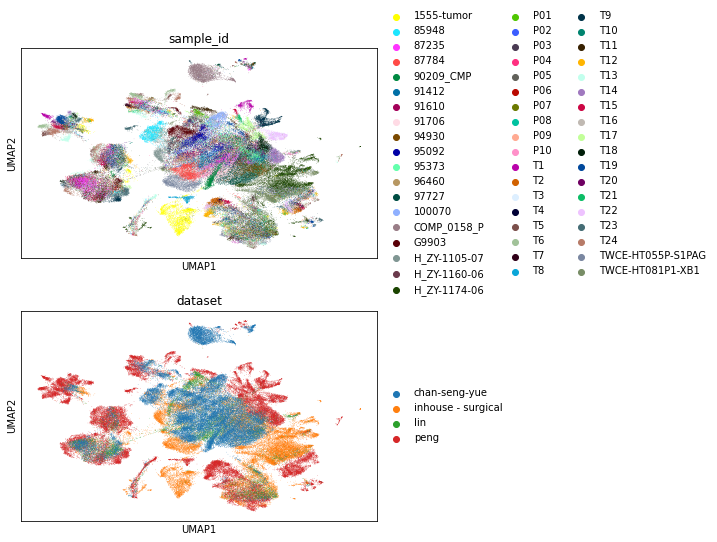

In [34]:
sc.pl.umap(adata, color=['sample_id', 'dataset'], ncols=1)

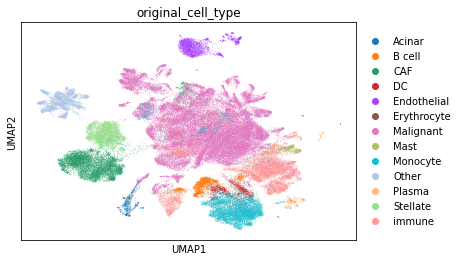

In [35]:
sc.pl.umap(adata, color='original_cell_type')

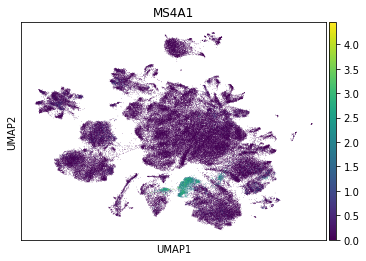

In [36]:
sc.pl.umap(adata, color=['MS4A1'])